In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

### Generating Data

In [3]:
X,Y = make_blobs? #generate linear data

In [104]:
X1,Y1 = make_moons?

In [107]:
X1,Y1 = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(X1.shape,Y1.shape)

(1000, 2) (1000,)


In [38]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=2,shuffle=True,random_state=11)

1. No. of centers -> # of clusters formed. n_sampls gets divided into n_centre no. of clusters
2. No. of samples -> dimension of feature vector
3. No. of features -> dimension of label vector
4. random state can be any random value

In [39]:
print(X.shape,Y.shape)

(500, 2) (500,)


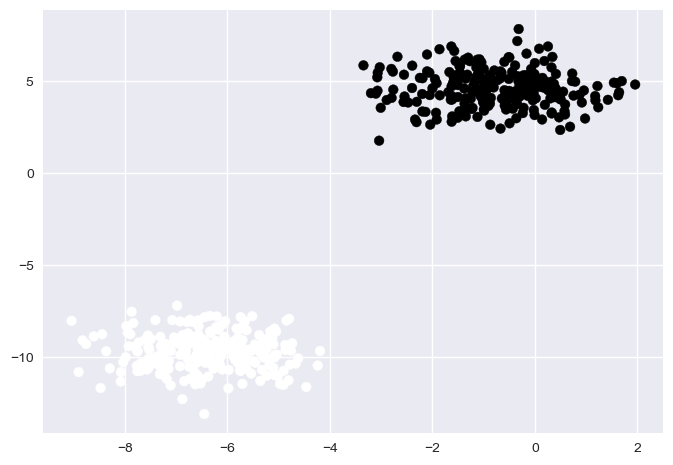

In [40]:
plt.scatter(X[:,0],X[:,1],c=Y) 
plt.show()

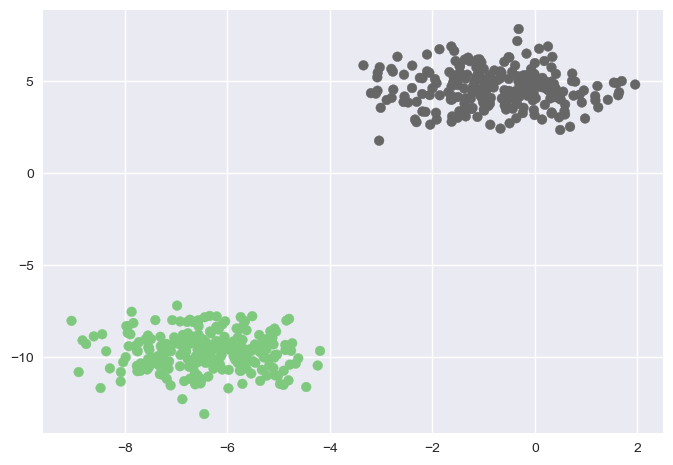

In [41]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

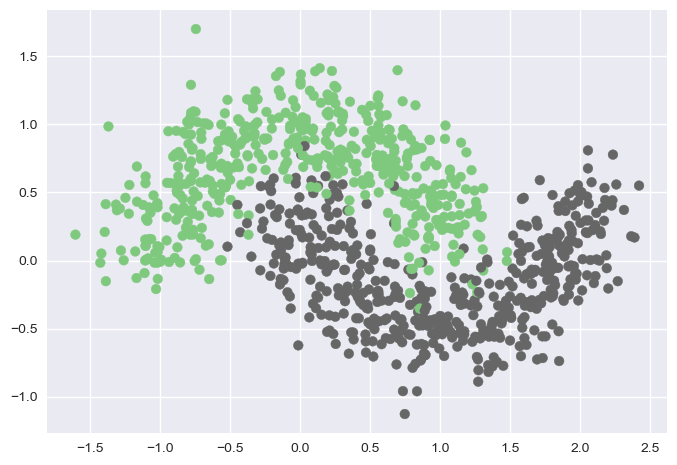

In [108]:
plt.style.use("seaborn")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap = plt.cm.Accent)
plt.show()

## Model and Helper Functions

In [42]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [43]:
# sigmoid function will automatically find sigmoid of every element of numpy array
# not possible with python list
# numpy array implements this using broadcasting technique
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

## Implement Perceptron learning algo
- Learn weights
- Reduce loss
- Make predictions

In [44]:
# weights = vector [w0,w1,w2,.......,wn]  ---> [n X 1]
# X  ---> [m X (n+1)]
# predictions y' = X.(weights)  ---> [m X 1]

def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions
    

In [118]:
# weights = vector [w0,w1,w2,.......,wn]  ---> [n X 1]
# X  ---> [m X (n+1)]
# predictions y' = X.(weights)  ---> [m X 1]

def predict1(X1,weights):
    z = np.dot(X1,weights)
    predictions = sigmoid(z)
    return predictions
    

In [51]:
# Binary Cross-entropy
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean( -Y * np.log(Y_) - ((1-Y) * (np.log(1-Y_))) )
    return cost

In [119]:
# Binary Cross-entropy
def loss1(X1,Y1,weights):
    Y1_ = predict1(X1,weights)
    cost = np.mean( -Y1 * np.log(Y1_) - ((1-Y1) * (np.log(1-Y1_))) )
    return cost

In [52]:
# x:row = n features and x:column = m examples
# x = [m X n] , xT = [n X m]
# (Y_ - Y) = [m X 1]
# dw = [n X 1]

# Perform update for 1 epoch
def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw = np.dot(X.T , (Y_- Y))
    
    m = X.shape[0]
    weights = weights - learning_rate * dw/(float(m))
    
    return weights
    

In [120]:
# x:row = n features and x:column = m examples
# x = [m X n] , xT = [n X m]
# (Y_ - Y) = [m X 1]
# dw = [n X 1]

# Perform update for 1 epoch
def update1(X1,Y1,weights1,learning_rate):
    Y1_ = predict1(X1,weights1)
    dw = np.dot(X1.T , (Y1_- Y1))
    
    m = X1.shape[0]
    weights1 = weights1 - learning_rate * dw/(float(m))
    
    return weights1
    

In [61]:
# X = [x1,x2,x3....xn]
# add bias term x0=1 --> X = [x0,x1,x2,x3....xn]
# it becomes [m X (n+1)]

def train(X,Y,learning_rate = 0.5 , max_epochs = 1000):
    bias = np.ones((X.shape[0],1)) # make a vector of [1,1,1.... m times]
    X = np.hstack((bias,X))
    
    weights = np.zeros(X.shape[1]) # make a vector of [0,0,0.... (n+1) times]
    
    for epoch in range(max_epochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10 == 0 :
            l = loss(X,Y,weights)
            print("Epoch %d - Loss %.4f" %(epoch,l))
    #weights       
    return weights 

In [121]:
# X = [x1,x2,x3....xn]
# add bias term x0=1 --> X = [x0,x1,x2,x3....xn]
# it becomes [m X (n+1)]

def train1(X1,Y1,learning_rate = 0.5 , max_epochs = 1000):
    bias = np.ones((X1.shape[0],1)) # make a vector of [1,1,1.... m times]
    X1 = np.hstack((bias,X1))
    
    weights1 = np.zeros(X1.shape[1]) # make a vector of [0,0,0.... (n+1) times]
    
    for epoch in range(max_epochs):
        weights1 = update(X1,Y1,weights1,learning_rate)
        
        if epoch%10 == 0 :
            l = loss1(X1,Y1,weights1)
            print("Epoch %d - Loss %.4f" %(epoch,l))
    #weights       
    return weights1 

In [74]:
weights = train(X,Y)

Epoch 0 - Loss 0.0018
Epoch 10 - Loss 0.0016
Epoch 20 - Loss 0.0015
Epoch 30 - Loss 0.0014
Epoch 40 - Loss 0.0013
Epoch 50 - Loss 0.0012
Epoch 60 - Loss 0.0011
Epoch 70 - Loss 0.0010
Epoch 80 - Loss 0.0010
Epoch 90 - Loss 0.0009
Epoch 100 - Loss 0.0009
Epoch 110 - Loss 0.0008
Epoch 120 - Loss 0.0008
Epoch 130 - Loss 0.0008
Epoch 140 - Loss 0.0007
Epoch 150 - Loss 0.0007
Epoch 160 - Loss 0.0007
Epoch 170 - Loss 0.0007
Epoch 180 - Loss 0.0006
Epoch 190 - Loss 0.0006
Epoch 200 - Loss 0.0006
Epoch 210 - Loss 0.0006
Epoch 220 - Loss 0.0006
Epoch 230 - Loss 0.0005
Epoch 240 - Loss 0.0005
Epoch 250 - Loss 0.0005
Epoch 260 - Loss 0.0005
Epoch 270 - Loss 0.0005
Epoch 280 - Loss 0.0005
Epoch 290 - Loss 0.0005
Epoch 300 - Loss 0.0004
Epoch 310 - Loss 0.0004
Epoch 320 - Loss 0.0004
Epoch 330 - Loss 0.0004
Epoch 340 - Loss 0.0004
Epoch 350 - Loss 0.0004
Epoch 360 - Loss 0.0004
Epoch 370 - Loss 0.0004
Epoch 380 - Loss 0.0004
Epoch 390 - Loss 0.0004
Epoch 400 - Loss 0.0004
Epoch 410 - Loss 0.0003
Epo

As u increase max_epochs , loss approaches zero


In [122]:
weights1 = train1(X1,Y1)

Epoch 0 - Loss 0.6481
Epoch 10 - Loss 0.4575
Epoch 20 - Loss 0.4005
Epoch 30 - Loss 0.3729
Epoch 40 - Loss 0.3562
Epoch 50 - Loss 0.3447
Epoch 60 - Loss 0.3362
Epoch 70 - Loss 0.3296
Epoch 80 - Loss 0.3244
Epoch 90 - Loss 0.3201
Epoch 100 - Loss 0.3166
Epoch 110 - Loss 0.3136
Epoch 120 - Loss 0.3111
Epoch 130 - Loss 0.3090
Epoch 140 - Loss 0.3072
Epoch 150 - Loss 0.3056
Epoch 160 - Loss 0.3042
Epoch 170 - Loss 0.3031
Epoch 180 - Loss 0.3020
Epoch 190 - Loss 0.3011
Epoch 200 - Loss 0.3004
Epoch 210 - Loss 0.2997
Epoch 220 - Loss 0.2991
Epoch 230 - Loss 0.2985
Epoch 240 - Loss 0.2980
Epoch 250 - Loss 0.2976
Epoch 260 - Loss 0.2972
Epoch 270 - Loss 0.2969
Epoch 280 - Loss 0.2966
Epoch 290 - Loss 0.2963
Epoch 300 - Loss 0.2960
Epoch 310 - Loss 0.2958
Epoch 320 - Loss 0.2956
Epoch 330 - Loss 0.2954
Epoch 340 - Loss 0.2953
Epoch 350 - Loss 0.2951
Epoch 360 - Loss 0.2950
Epoch 370 - Loss 0.2949
Epoch 380 - Loss 0.2948
Epoch 390 - Loss 0.2947
Epoch 400 - Loss 0.2946
Epoch 410 - Loss 0.2945
Epo

## PERCEPTRON IMPLEMENTATION - II
- Make predictions
- Visulalize decision surface
- Linear vs non-linear classification

In [95]:
# X_test = [ m X n] and weights = [(n+1) X 1]

def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        bias = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((bias,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels
    

In [123]:
# X_test = [ m X n] and weights = [(n+1) X 1]

def getPredictions1(X_Test1,weights1,labels1=True):
    if X_Test1.shape[1] != weights1.shape[0]:
        bias = np.ones((X_Test1.shape[0],1))
        X_Test1 = np.hstack((bias,X_Test1))
        
    probs1 = predict1(X_Test1,weights1)
    
    if not labels1:
        return probs1
    else:
        labels1 = np.zeros(probs1.shape)
        labels1[probs1>=0.5] = 1
        return labels1
    

In [64]:
# not part of actial code . just an example to show above part
a = np.zeros((5,5)) # make a 5 X 5 matrix filled with all zeros

a[2,3] = 10

a[a>0] = 20

print(a)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [90]:
weights

array([0.2079143 , 0.30313474, 2.32793286])

In [124]:
weights1

array([ 0.66251642,  1.18787085, -4.93821942])

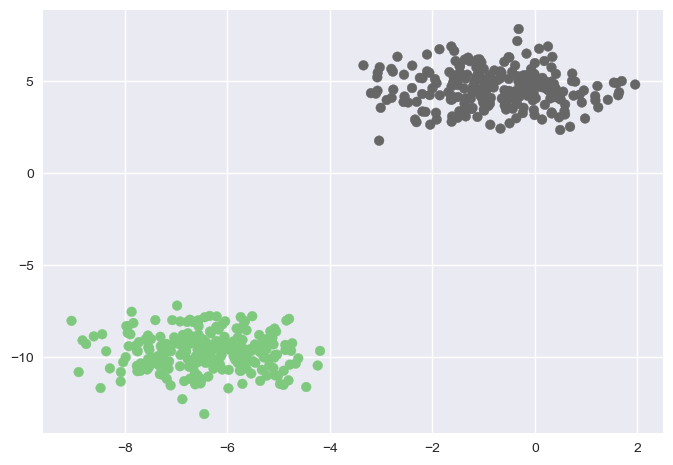

In [91]:
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap = plt.cm.Accent)
plt.show()

In [92]:
x1 = np.linspace(-12,2,10)
print (x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print (x2)

[-12.         -10.44444444  -8.88888889  -7.33333333  -5.77777778
  -4.22222222  -2.66666667  -1.11111111   0.44444444   2.        ]
[ 1.47328245  1.2707238   1.06816515  0.8656065   0.66304785  0.4604892
  0.25793056  0.05537191 -0.14718674 -0.34974539]


In [127]:
x11 = np.linspace(-2,2,10)
print (x11)

x21 = -(weights1[0] + weights1[1]*x11)/weights1[2]
print (x21)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
[-0.34693179 -0.24002228 -0.13311277 -0.02620327  0.08070624  0.18761575
  0.29452525  0.40143476  0.50834427  0.61525377]


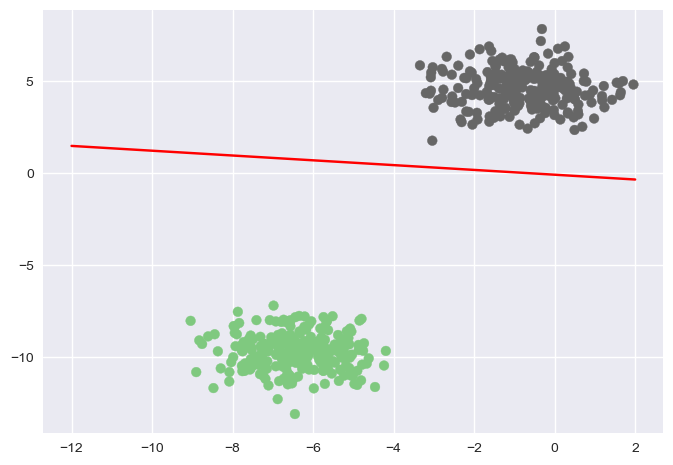

In [93]:
plt.scatter(X[:,0] , X[:,1] , c=Y , cmap = plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

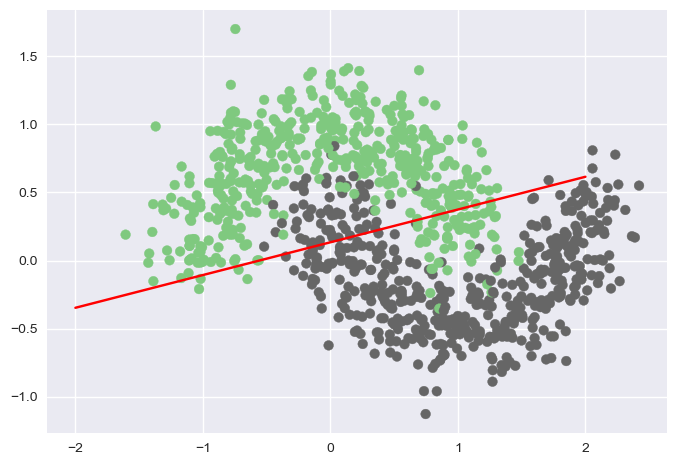

In [128]:
plt.scatter(X1[:,0] , X1[:,1] , c=Y1 , cmap = plt.cm.Accent)
plt.plot(x11,x21,c='red')
plt.show()

In [99]:
 # Accuracy
Y_ = getPredictions(X,weights,labels=True)
print(Y_)
training_acc = np.sum(Y == Y_)/Y.shape[0]
print(training_acc)

[1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [129]:
 # Accuracy
Y1_ = getPredictions1(X1,weights1,labels1=True)
print(Y1_)
training_acc1 = np.sum(Y1 == Y1_)/Y1.shape[0]
print(training_acc1)

[0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.